# Imports

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
files_dir = 'drive/My Drive/Twitter_bot/dataset/datasets_full/'
save_plot = 'drive/My Drive/Twitter_bot/plots/'

# Functions

In [0]:
def get_details(df):
  print('Column:\t Unique Values')
  for i in df.columns :
    print('{} : {}'.format(i, df[i].nunique()))
    print('Top 5 values')
    print(df[i].value_counts()[:5])
    print()
    print()

def get_times(df):
  df['timestamp'] = pd.to_datetime(df['timestamp'])
  df['Year'] = df['timestamp'].apply(lambda x: x.year)
  df['Hour'] = df['timestamp'].apply(lambda x: x.hour)
  df['Day of Week'] = df['timestamp'].apply(lambda day:day.dayofweek)
  dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
  df['Day of Week'] = df['Day of Week'].map(dmap)
  df['Date'] = df['timestamp'].apply(lambda time:time.date())
  return df

# Check for important columns

In [0]:
get_details(genuine_users)

In [0]:
get_details(fake_users)

# Genuine Users

In [0]:
genuine_users = pd.read_csv(files_dir+'genuine_accounts.csv/users.csv').drop(labels='url lang time_zone location default_profile_image profile_image_url \
                                                                        profile_banner_url profile_background_image_url_https profile_sidebar_border_color \
                                                                        profile_image_url_https profile_background_image_url utc_offset is_translator \
                                                                        follow_request_sent protected verified notifications contributors_enabled \
                                                                        following timestamp crawled_at updated test_set_1 test_set_2'.split(), axis = 1)
genuine_users.fillna(0,inplace = True)
genuine_tweets = pd.read_csv(files_dir+'genuine_accounts.csv/tweets.csv')
genuine_tweets.drop(labels = 'id source truncated in_reply_to_status_id contributors possibly_sensitive created_at crawled_at retweeted updated'.split(),axis = 1, inplace = True)
genuine_tweets.fillna(0,inplace = True)
genuine_tweets = get_times(genuine_tweets)

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


protected and verified had 78 and 11 trues only
> contributors enabled was nan
> followings was nan



In [0]:
# Checking columns
genuine_users.columns

Index(['id', 'name', 'screen_name', 'statuses_count', 'followers_count',
       'friends_count', 'favourites_count', 'listed_count', 'default_profile',
       'geo_enabled', 'profile_use_background_image', 'profile_text_color',
       'profile_background_tile', 'profile_sidebar_fill_color',
       'profile_background_color', 'profile_link_color', 'description',
       'created_at'],
      dtype='object')

In [0]:
# Getting the feel of it!
genuine_users.head(3)

,id,name,screen_name,statuses_count,followers_count,friends_count,favourites_count,listed_count,default_profile,geo_enabled,profile_use_background_image,profile_text_color,profile_background_tile,profile_sidebar_fill_color,profile_background_color,profile_link_color,description,created_at
0,1502026416,TASUKU HAYAKAWA,0918Bask,2177,208,332,265,1,0.0,1.0,0.0,000000,0.0,000000,000000,EB0C1F,15years ago X.Lines24,Tue Jun 11 11:20:35 +0000 2013
1,2492782375,ro_or,1120Roll,2660,330,485,3972,5,1.0,1.0,1.0,333333,0.0,DDEEF6,C0DEED,0084B4,保守見習い地元大好き人間。 経済学、電工、仏教を勉強中、ちなDeではいかんのか？ (*^◯^*),Tue May 13 10:37:57 +0000 2014
2,293212315,bearclaw,14KBBrown,1254,166,177,1185,0,0.0,0.0,1.0,0F9A89,1.0,EED96D,E63A50,E63A50,Let me see what your best move is!,Wed May 04 23:30:37 +0000 2011


In [0]:
# Feature co relation
genuine_users.drop(labels = ['id'],axis = 1).corr(method='spearman')

,statuses_count,followers_count,friends_count,favourites_count,listed_count,default_profile,geo_enabled,profile_use_background_image,profile_background_tile
statuses_count,1.000000,0.708135,0.424404,0.548473,0.520906,-0.319519,0.199350,0.002448,0.262440
followers_count,0.708135,1.000000,0.682161,0.497384,0.591647,-0.251979,0.189971,0.001440,0.216168
friends_count,0.424404,0.682161,1.000000,0.309899,0.447176,-0.187360,0.162943,0.024902,0.142555
favourites_count,0.548473,0.497384,0.309899,1.000000,0.178903,-0.088115,0.163497,-0.001094,0.122351
listed_count,0.520906,0.591647,0.447176,0.178903,1.000000,-0.294959,0.070309,-0.047509,0.140842
default_profile,-0.319519,-0.251979,-0.187360,-0.088115,-0.294959,1.000000,-0.111851,0.231176,-0.504865
geo_enabled,0.199350,0.189971,0.162943,0.163497,0.070309,-0.111851,1.000000,0.046832,0.083550
profile_use_background_image,0.002448,0.001440,0.024902,-0.001094,-0.047509,0.231176,0.046832,1.000000,0.138772
profile_background_tile,0.262440,0.216168,0.142555,0.122351,0.140842,-0.504865,0.083550,0.138772,1.000000


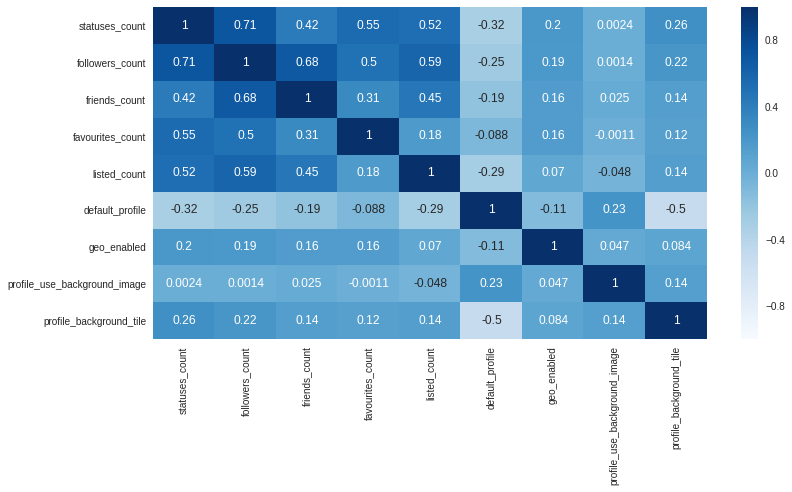

In [0]:

plt.figure(figsize=(12,7))
sns.heatmap(genuine_users.drop(labels = ['id'],axis = 1).corr(method='spearman'), cmap='Blues', annot=True)
plt.tight_layout()
#plt.savefig(save_plot+'/trad_bots/1_Feature_corrG',dpi = 300)

# Traditional Bots

In [0]:
trad_bots_users = pd.read_csv(files_dir+'traditional_spambots_1.csv/users.csv').drop(labels='url lang time_zone location default_profile_image profile_image_url \
                                                                        profile_banner_url profile_background_image_url_https profile_sidebar_border_color \
                                                                        profile_image_url_https profile_background_image_url utc_offset is_translator \
                                                                        follow_request_sent protected verified notifications contributors_enabled \
                                                                        following timestamp crawled_at updated default_profile profile_use_background_image \
                                                                        profile_text_color profile_background_tile profile_sidebar_fill_color profile_link_color \
                                                                        profile_background_color'.split(), axis = 1)
trad_bots_tweets = pd.read_csv(files_dir+'traditional_spambots_1.csv/tweets.csv')
trad_bots_tweets.drop(labels = 'id source truncated in_reply_to_status_id contributors possibly_sensitive created_at crawled_at retweeted updated'.split(),axis = 1, inplace = True)
trad_bots_tweets.fillna(0,inplace = True)
trad_bots_users.fillna(0,inplace = True)
trad_bots_users.columns

Index(['id', 'name', 'screen_name', 'statuses_count', 'followers_count',
       'friends_count', 'favourites_count', 'listed_count', 'geo_enabled',
       'description', 'created_at'],
      dtype='object')

In [0]:
trad_bots_tweets = get_times(trad_bots_tweets)

In [0]:
trad_bots_users.head(2)

,id,name,screen_name,statuses_count,followers_count,friends_count,favourites_count,listed_count,geo_enabled,description,created_at
0,7248952,Bhuvan Chand,tarunkjuyal,1259,837,1978,3200,9,0.0,Love Your Life,1183552203000L
1,7732472,Daniel Wagner,DanielWagner,770,3274,3595,8,22,0.0,I am an internet marketing coach and mentor wh...,1185440851000L


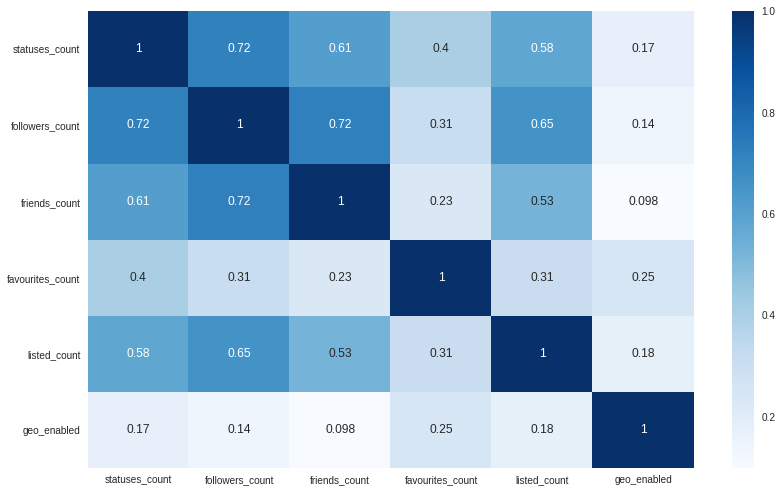

In [0]:

plt.figure(figsize=(12,7))
sns.heatmap(trad_bots_users.drop(labels = ['id'],axis = 1).corr(method='spearman'), cmap='Blues', annot=True)
plt.tight_layout()
#plt.savefig(save_plot+'/trad_bots/2_Feature_corr_bots',dpi = 300)

# Fake Followers

In [0]:
fake_users = pd.read_csv(files_dir+'fake_followers.csv/users.csv').drop(labels='url lang time_zone location default_profile_image profile_image_url \
                                                                        profile_banner_url profile_background_image_url_https profile_sidebar_border_color \
                                                                        profile_image_url_https profile_background_image_url utc_offset is_translator \
                                                                        follow_request_sent protected verified notifications contributors_enabled \
                                                                        following updated'.split(), axis = 1)
fake_tweets = pd.read_csv(files_dir+'fake_followers.csv/tweets.csv')
fake_users.fillna(0,inplace = True)

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (8,11) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [0]:
fake_tweets = get_times(fake_tweets)

# Spam Bots

In [0]:
s_spb_users = pd.read_csv(files_dir+'social_spambots_3.csv/users.csv').drop(labels='url lang time_zone location default_profile_image profile_image_url \
                                                                        profile_banner_url profile_background_image_url_https profile_sidebar_border_color \
                                                                        profile_image_url_https profile_background_image_url utc_offset is_translator \
                                                                        follow_request_sent protected verified notifications contributors_enabled \
                                                                        following updated'.split(), axis = 1)
s_spb_tweets = pd.read_csv(files_dir+'social_spambots_3.csv/tweets.csv')
s_spb_users.fillna(0,inplace = True)
s_spb_tweets.fillna(0,inplace = True)

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (7,10) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [0]:
s_spb_tweets = get_times(s_spb_tweets)

# Tweets

In [0]:
genuine_tweets['Year'].value_counts()

2015    1427816
2014     995276
2013     265330
2012      89094
2011      32318
2010      18122
2009      10066
2008       1287
2007         52
1970          1
Name: Year, dtype: int64

In [0]:
trad_bots_tweets['Year'].value_counts()

2010    83931
2009    60715
2008      444
2007        4
Name: Year, dtype: int64

In [0]:
s_spb_tweets['Year'].value_counts()

2014    1386305
2013      21871
2012       6622
2011       2896
2010        727
2009        136
Name: Year, dtype: int64

# Visuals

In [0]:
genuine_tweets.head(3)

,text,user_id,in_reply_to_user_id,in_reply_to_screen_name,retweeted_status_id,geo,place,retweet_count,reply_count,favorite_count,favorited,num_hashtags,num_urls,num_mentions,timestamp,Year,Hour,Day of Week,Date
0,RT @morningJewshow: Speaking about Jews and co...,678033.0,0.0,0,5.939322e+17,0.0,0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,2015-05-01 02:18:11,2015,2,Fri,2015-05-01
1,This age/face recognition thing..no reason pla...,678033.0,0.0,0,0.000000e+00,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2015-04-30 23:50:52,2015,23,Thu,2015-04-30
2,Only upside of the moment I can think of is th...,678033.0,0.0,0,0.000000e+00,0.0,0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,2015-04-30 22:52:32,2015,22,Thu,2015-04-30


In [0]:
trad_bots_tweets.head(3)

,text,user_id,in_reply_to_user_id,in_reply_to_screen_name,retweeted_status_id,geo,place,retweet_count,reply_count,favorite_count,favorited,num_hashtags,num_urls,num_mentions,timestamp,Year,Hour,Day of Week
0,CPPRI Recruitment 2010 at http://ping.fm/yp8zH,7248952,0,0,0,0.0,0.0,0,0,0,0.0,0,1,0,2010-08-31 21:24:14,2010,21,Tue
1,National Games Secretariat Recruitment 2010 :...,7248952,0,0,0,0.0,0.0,0,0,0,0.0,0,1,0,2010-08-31 21:24:11,2010,21,Tue
2,CIPET Recruitment Jobs at http://ping.fm/KnFCa,7248952,0,0,0,0.0,0.0,0,0,0,0.0,0,1,0,2010-08-31 21:23:12,2010,21,Tue


In [0]:
genuine_users[genuine_users['id'] == genuine_tweets['user_id'][0]]

,id,name,screen_name,statuses_count,followers_count,friends_count,favourites_count,listed_count,default_profile,geo_enabled,profile_use_background_image,profile_text_color,profile_background_tile,profile_sidebar_fill_color,profile_background_color,profile_link_color,description,created_at
2274,678033,Heather Gold,heathr,45825,7065,1822,3804,596,0.0,0.0,0.0,000000,1.0,E0FF92,FFFFFF,FF5300,Comic. Writer. Speaker. My heart is hardwired ...,Mon Jan 22 01:57:38 +0000 2007


In [0]:
genuine_users['id'].nunique()

3474

- Genuine tweets from 1084 users having total of 2839362
- Fake tweets from 1000 users having total of 145094






# Tweets_times

## Genuine_users v/s Trad_bots
- As the data in trad_bots was old its was then later compared with social spam bots

In [0]:
genuine_tweets.head()

,text,user_id,in_reply_to_user_id,in_reply_to_screen_name,retweeted_status_id,geo,place,retweet_count,reply_count,favorite_count,favorited,num_hashtags,num_urls,num_mentions,timestamp,Year,Hour,Day of Week
0,RT @morningJewshow: Speaking about Jews and co...,678033.0,0.0,0,5.939322e+17,0.0,0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,2015-05-01 02:18:11,2015,2,Fri
1,This age/face recognition thing..no reason pla...,678033.0,0.0,0,0.000000e+00,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2015-04-30 23:50:52,2015,23,Thu
2,Only upside of the moment I can think of is th...,678033.0,0.0,0,0.000000e+00,0.0,0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,2015-04-30 22:52:32,2015,22,Thu
3,If you're going to think about+create experien...,678033.0,0.0,0,0.000000e+00,0.0,0,2.0,0.0,1.0,0.0,2.0,0.0,0.0,2015-04-30 20:42:40,2015,20,Thu
4,Watching a thread on FB about possible future ...,678033.0,0.0,0,0.000000e+00,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2015-04-30 20:41:36,2015,20,Thu


In [0]:
tempdf = pd.concat([genuine_tweets['Hour'],genuine_tweets['Day of Week'],pd.DataFrame(np.zeros((2839362,),dtype = int),columns=['BOT'])\
                   , pd.DataFrame(np.ones((2839362,),dtype = int),columns=['e']), genuine_tweets['Date'],genuine_tweets['Year']],axis = 1)
botdf = pd.concat([trad_bots_tweets['Hour'],trad_bots_tweets['Day of Week'],pd.DataFrame(np.ones((145094,),dtype = int),columns=['BOT'])\
                  , pd.DataFrame(np.ones((145094,),dtype = int),columns=['e']), trad_bots_tweets['Date'],trad_bots_tweets['Year']],axis = 1)
tempdf = tempdf.append(botdf,ignore_index = True)

In [0]:
tempdf.head()

,Hour,Day of Week,BOT,e,Date,Year
0,2,Fri,0,1,2015-05-01,2015
1,23,Thu,0,1,2015-04-30,2015
2,22,Thu,0,1,2015-04-30,2015
3,20,Thu,0,1,2015-04-30,2015
4,20,Thu,0,1,2015-04-30,2015


In [0]:

# groupby  hour
g_byHour = tempdf[tempdf['BOT'] == 0].groupby(by = ['Day of Week', 'Hour'])['e'].sum().unstack()
b_byHour = tempdf[tempdf['BOT'] == 1].groupby(by = ['Day of Week', 'Hour'])['e'].sum().unstack()
g_byHour.head(3)

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Day of Week,,,,,,,,,,,,,,,,,,,,,
Fri,18498,19609,21110,23155,22914,23448,21677,18354,14879,12339,...,14115,16517,18179,18009,17889,17490,16778,16239,16234,16763
Mon,19180,19897,22120,23306,24555,24555,20437,17572,15204,12241,...,13793,15994,17155,17915,17784,17709,17837,17308,18899,18753
Sat,16403,16202,16074,17055,17922,17661,17382,15477,13557,11901,...,11867,14587,16162,16510,17109,16674,16793,16282,16524,16406


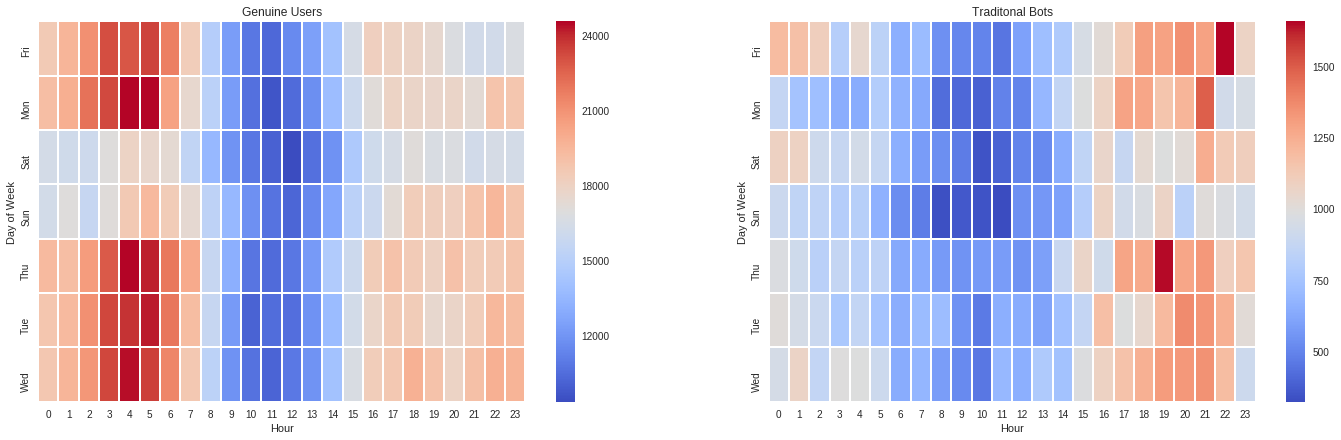

In [0]:
# Heatmap
fig, axs = plt.subplots(ncols=2,figsize=(24,7))
sns.heatmap(g_byHour,linewidths=1,cmap = 'coolwarm',ax = axs[0])
axs[0].title.set_text('Genuine Users')
sns.heatmap(b_byHour,linewidths=1,cmap = 'coolwarm',ax = axs[1])
axs[1].title.set_text('Traditonal Bots')
#plt.savefig(save_plot+'3_Heatmap_gen_tradBots',dpi = 300)

In [0]:
# by date
g_bydate = tempdf[(tempdf['BOT'] == 0) & (tempdf['Year'] == 2015)].groupby('Date')['e'].sum() # incorrect for comparision take some recent dataset
b_bydate = tempdf[(tempdf['BOT'] == 1) & (tempdf['Year']>2008)].groupby('Date')['e'].sum()

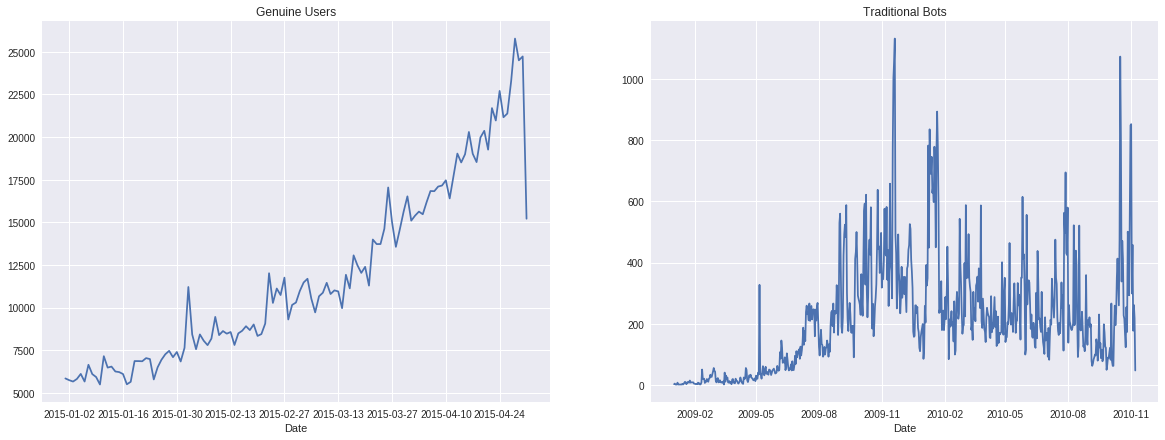

In [0]:
# date-wise tweets posted by genuine and Traditional bots
fig, axs = plt.subplots(ncols=2,figsize = (20,7))
plt.tight_layout
g_bydate.plot(ax = axs[0])
axs[0].title.set_text('Genuine Users')
b_bydate.plot(ax = axs[1])
axs[1].title.set_text('Traditional Bots')
#plt.savefig(save_plot+'4_Tweets_datewise_gen_tradBots',dpi = 300)


/usr/local/lib/python3.6/dist-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: The axisbg attribute was deprecated in version 2.0. Use facecolor instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


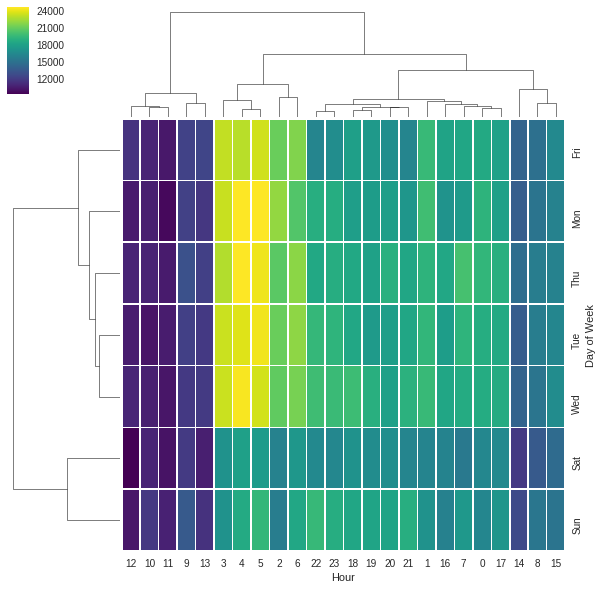

In [0]:
sns.clustermap(data = g_byHour, cmap = 'viridis', lineWidths = 0.5)
#plt.savefig(save_plot+'Genuine_Users_Clustermap',dpi = 300)

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


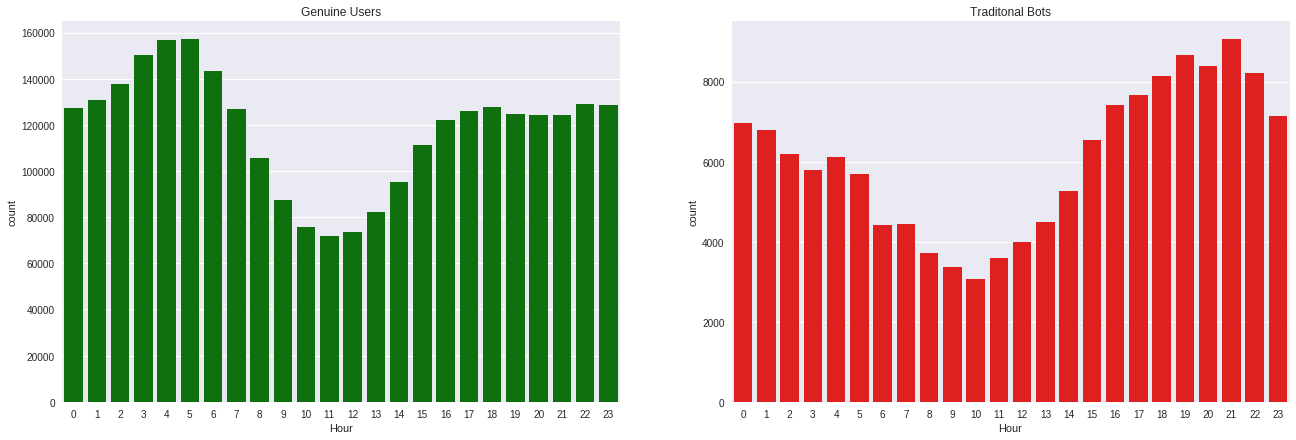

In [0]:
# By Hour
fig, axs = plt.subplots(ncols=2,figsize = (22,7))
sns.countplot(x = 'Hour', data = tempdf[tempdf['BOT'] == 0],ax = axs[0],color = 'GREEN')
axs[0].title.set_text('Genuine Users')
sns.countplot(x = 'Hour', data = tempdf[tempdf['BOT'] == 1],ax = axs[1], color = 'RED')
axs[1].title.set_text('Traditonal Bots')
#plt.savefig(save_plot+'5_By_hour_tweets',dpi = 300)

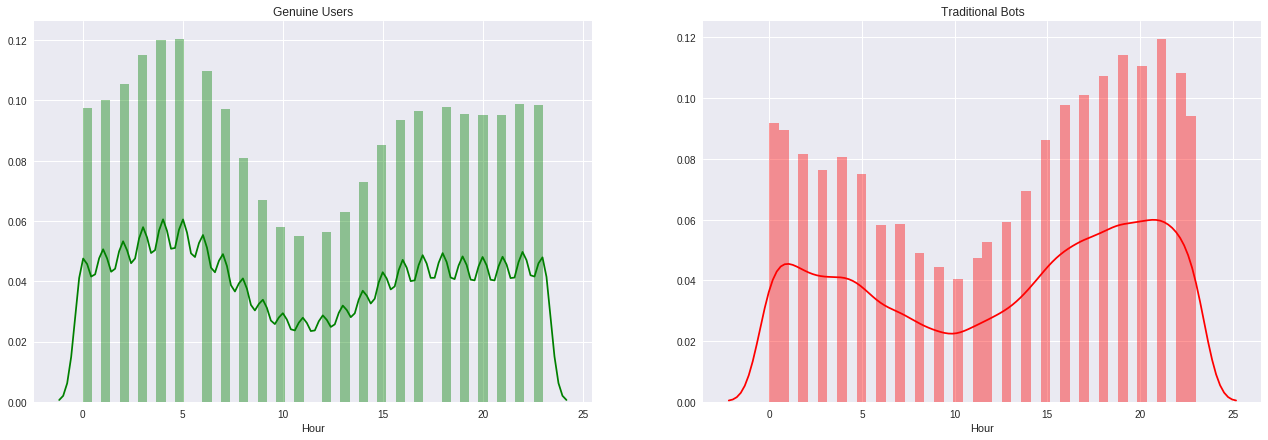

In [0]:
# distplots
fig, axs = plt.subplots(ncols=2,figsize = (22,7))
sns.distplot(tempdf[tempdf['BOT'] == 0]['Hour'],ax = axs[0],color = 'Green')
axs[0].title.set_text('Genuine Users')
sns.distplot(tempdf[tempdf['BOT'] == 1]['Hour'].fillna(0),ax = axs[1], color = 'Red')
axs[1].title.set_text('Traditional Bots')
#plt.savefig(save_plot+'/trad_bots/6_By_hour_tweets_dist', dpi = 300)

In [0]:
# Don't Run
#sns.distplot(tempdf[tempdf['BOT'] == 0]['Day of Week'])

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


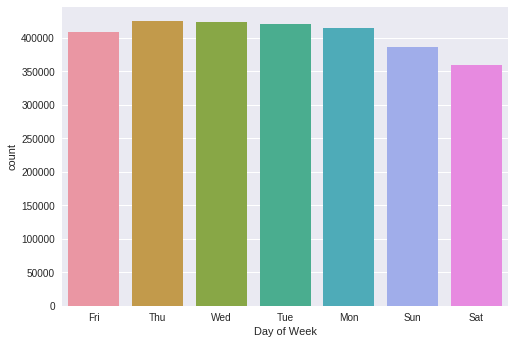

In [0]:
sns.countplot(genuine_tweets['Day of Week'])

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


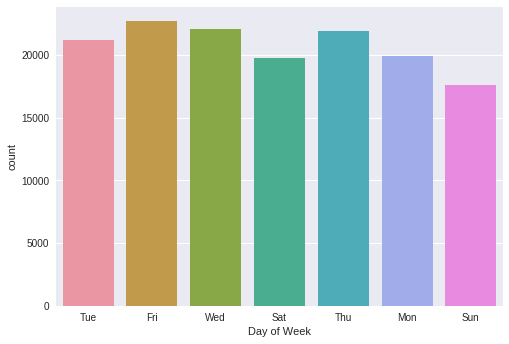

In [0]:
sns.countplot(trad_bots_tweets['Day of Week'])

# VS FAkE Followers

# VS SociAl SpaMBots

In [0]:
s_spb_tweets.info()

In [0]:
s_spb_tweets['Year'].value_counts()

2014    1386305
2013      21871
2012       6622
2011       2896
2010        727
2009        136
Name: Year, dtype: int64

In [0]:
s_spb_tweets['user_id'].nunique()

464

 - Genuine tweets from 1084 users having total of 2,839,362
 - Social Spam bots has 464 bots and totol of 1,418,558

# Social Spam Bots dataset

In [0]:
gen_tweets_df = pd.concat([genuine_tweets['Hour'],genuine_tweets['Day of Week'],pd.DataFrame(np.zeros((2839362,),dtype = int),columns=['BOT'])\
                   , pd.DataFrame(np.ones((2839362,),dtype = int),columns=['e']), genuine_tweets['Date'],genuine_tweets['Year']],axis = 1)
tempdf2 = pd.concat([s_spb_tweets['Hour'],s_spb_tweets['Day of Week'],pd.DataFrame(np.ones((1418558,),dtype = int),columns=['BOT'])\
                  , pd.DataFrame(np.ones((1418558,),dtype = int),columns=['e']), s_spb_tweets['Date'],s_spb_tweets['Year']],axis = 1)
tempdf2 = tempdf2.append(gen_tweets_df,ignore_index = True)

In [0]:
tempdf2.head()

,Hour,Day of Week,BOT,e,Date,Year
0,21.0,Wed,1,1,2014-11-12,2014.0
1,21.0,Wed,1,1,2014-11-12,2014.0
2,21.0,Wed,1,1,2014-11-12,2014.0
3,20.0,Wed,1,1,2014-11-12,2014.0
4,20.0,Wed,1,1,2014-11-12,2014.0


In [0]:
tempdf2.BOT.value_counts()

0    2839362
1    1418558
Name: BOT, dtype: int64

In [0]:

# groupby  hour
g_byHour2 = tempdf2[tempdf2['BOT'] == 0].groupby(by = ['Day of Week', 'Hour'])['e'].sum().unstack()
b_byHour2 = tempdf2[tempdf2['BOT'] == 1].groupby(by = ['Day of Week', 'Hour'])['e'].count().unstack()
# by date
g_bydate2 = tempdf2[(tempdf2['BOT'] == 0) & (tempdf2['Year'] > 2013)].groupby('Date')['e'].sum() # incorrect for comparision take some recent dataset
b_bydate2 = tempdf2[(tempdf2['BOT'] == 1) & (tempdf2['Year']> 2013)].groupby('Date')['e'].sum()

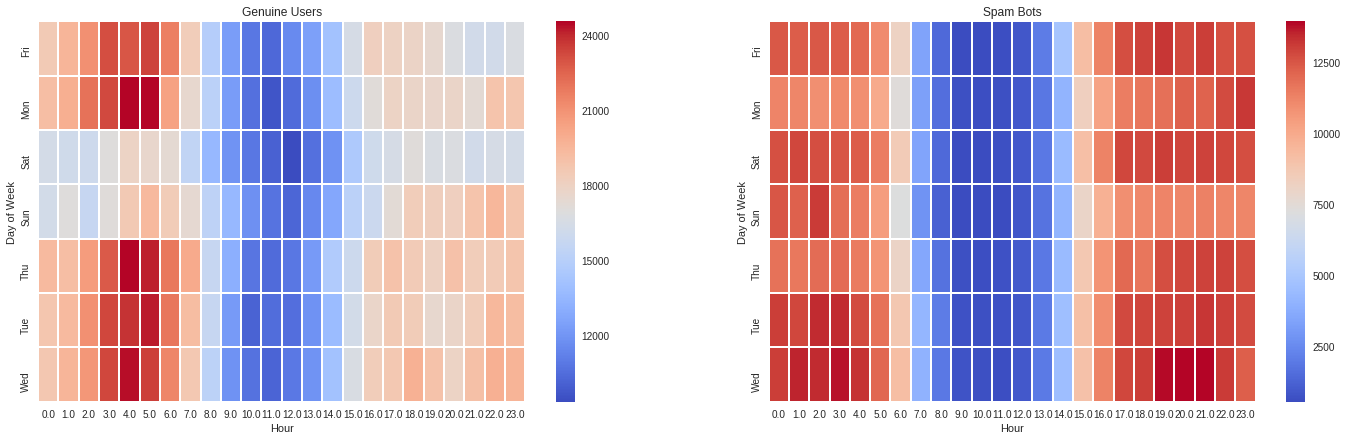

In [0]:
# Heatmap
fig, axs = plt.subplots(ncols=2,figsize=(24,7))
sns.heatmap(g_byHour2,linewidths=1,cmap = 'coolwarm',ax = axs[0])
axs[0].title.set_text('Genuine Users')
sns.heatmap(b_byHour2,linewidths=1,cmap = 'coolwarm',ax = axs[1])
axs[1].title.set_text('Spam Bots')
#plt.savefig(save_plot+'/soc_bots/1_Heatmap_gen_spam',dpi = 300)

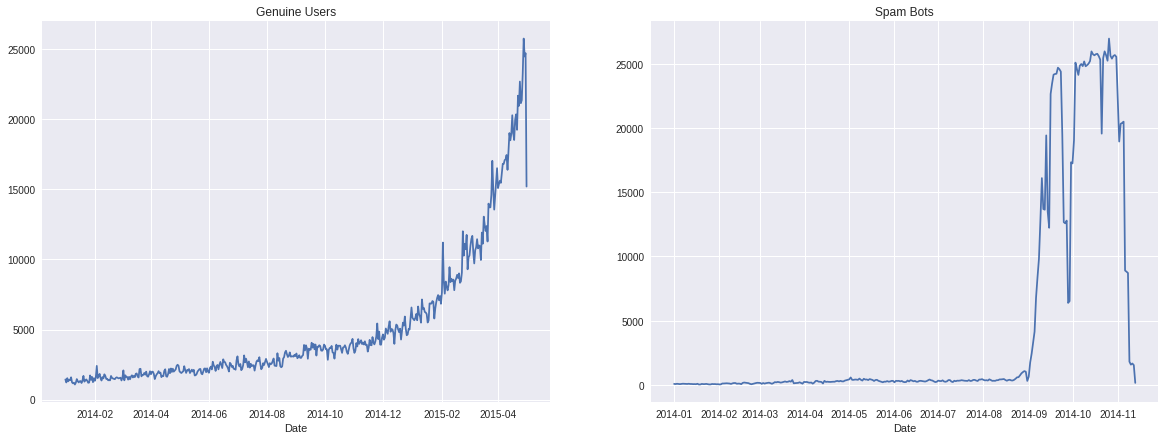

In [0]:
# date-wise tweets posted by genuine and spam bots
fig, axs = plt.subplots(ncols=2,figsize = (20,7))
g_bydate2.plot(ax = axs[0])
axs[0].title.set_text('Genuine Users')
b_bydate2.plot(ax = axs[1])
axs[1].title.set_text('Spam Bots')
#plt.savefig(save_plot+'/soc_bots/2_By_date_tweets_dist', dpi = 300)

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


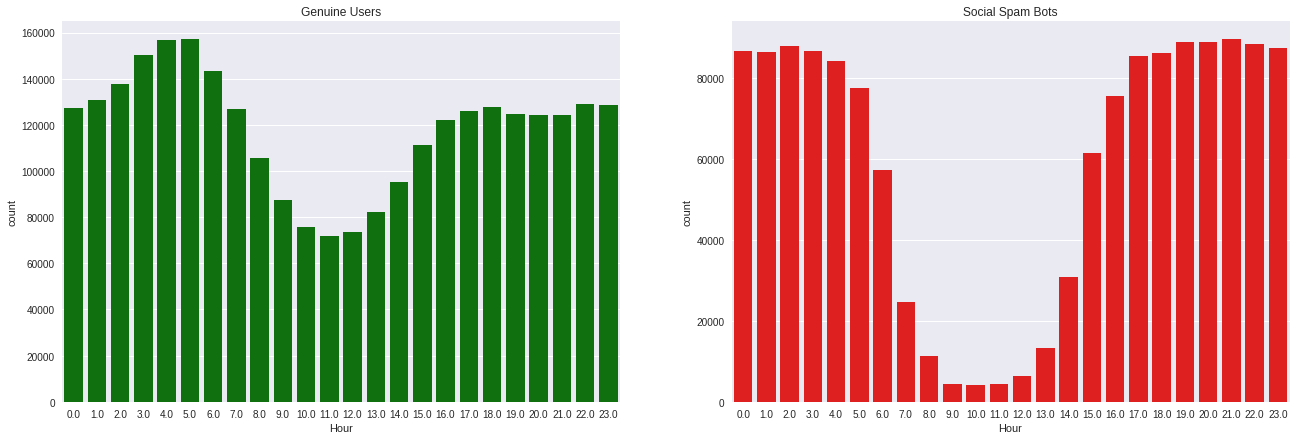

In [0]:
fig, axs = plt.subplots(ncols=2,figsize = (22,7))
sns.countplot(x = 'Hour', data = tempdf2[tempdf2['BOT'] == 0],ax = axs[0],color = 'GREEN')
axs[0].title.set_text('Genuine Users')
sns.countplot(x = 'Hour', data = tempdf2[tempdf2['BOT'] == 1],ax = axs[1], color = 'RED')
axs[1].title.set_text('Social Spam Bots')
#plt.savefig(save_plot+'/soc_bots/3_By_time_tweets_gen_spam',dpi = 300)

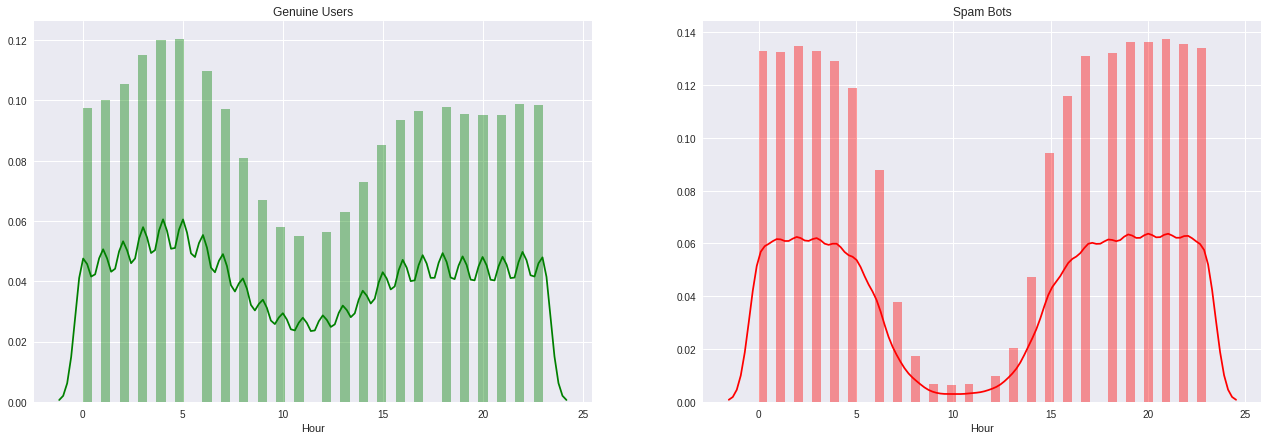

In [0]:
# distplots
fig, axs = plt.subplots(ncols=2,figsize = (22,7))
sns.distplot(tempdf2[tempdf2['BOT'] == 0]['Hour'],ax = axs[0],color = 'Green')
axs[0].title.set_text('Genuine Users')
sns.distplot(tempdf2[tempdf2['BOT'] == 1]['Hour'].fillna(0),ax = axs[1], color = 'Red')
axs[1].title.set_text('Spam Bots')
#plt.savefig(save_plot+'/soc_bots/4_By_date_tweets_dist_gen_spam',dpi = 300)

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


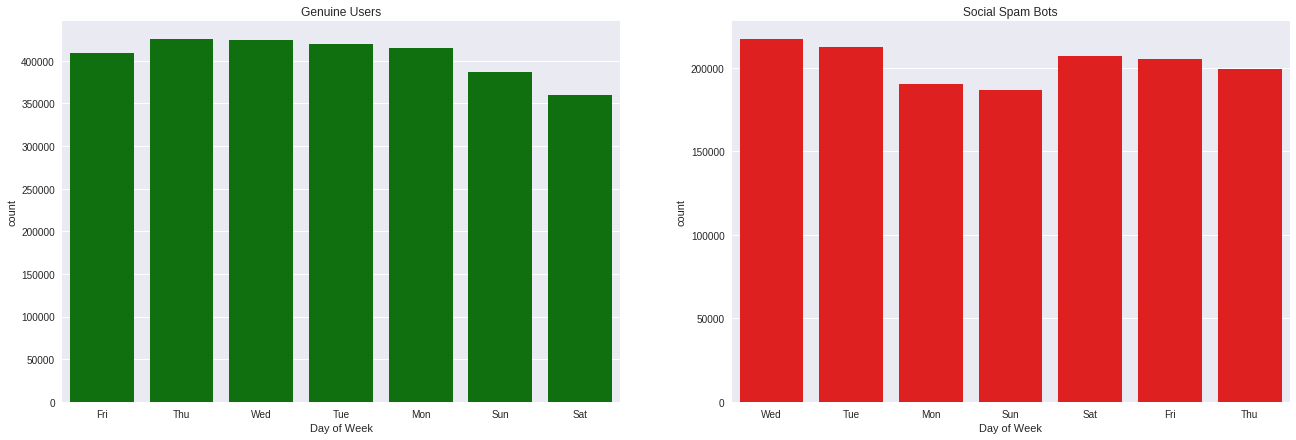

In [0]:
fig, axs = plt.subplots(ncols=2,figsize = (22,7))
sns.countplot(x = 'Day of Week', data = tempdf2[tempdf2['BOT'] == 0],ax = axs[0],color = 'GREEN')
axs[0].title.set_text('Genuine Users')
sns.countplot(x = 'Day of Week', data = tempdf2[tempdf2['BOT'] == 1],ax = axs[1], color = 'RED')
axs[1].title.set_text('Social Spam Bots')

/usr/local/lib/python3.6/dist-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: The axisbg attribute was deprecated in version 2.0. Use facecolor instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


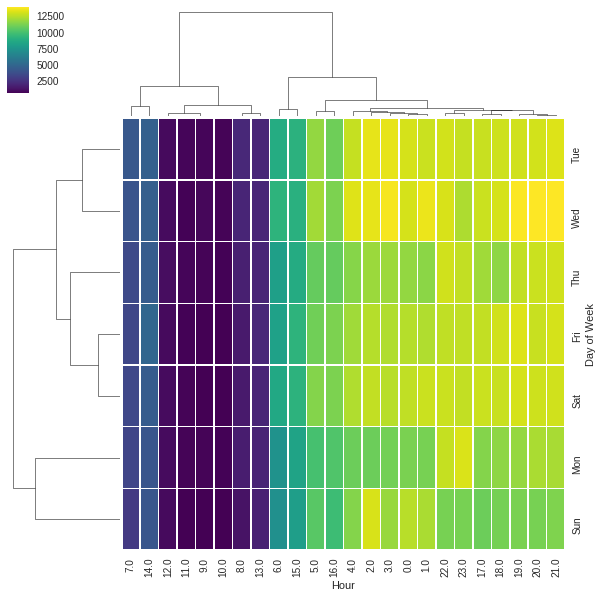

In [0]:
sns.clustermap(data = b_byHour2, cmap = 'viridis', lineWidths = 0.5)
#plt.savefig(save_plot+'Spam_bots_Clustermap',dpi = 300)

- tweeting pattern
- tweets analysis bot vs human
- account details follower vs followers
- ID COMPARISION

# Tweet Analysis

- geo, favorited, retweeted counts where '0' why??

In [0]:
g_tw = genuine_tweets['user_id text retweet_count favorite_count num_hashtags num_urls num_mentions Year'.split()]
b_tw = s_spb_tweets['user_id text retweet_count favorite_count num_hashtags num_urls num_mentions Year'.split()]
g_tw = pd.concat([pd.DataFrame(np.ones((2839362,),dtype = int),columns=['e']),g_tw],axis = 1)
b_tw = pd.concat([pd.DataFrame(np.ones((1418558,),dtype = int),columns=['e']),b_tw],axis = 1)

In [0]:
b_tw.head()

,e,user_id,text,retweet_count,favorite_count,num_hashtags,num_urls,num_mentions,Year
0,1,16282004.0,Am postat o fotografie nouă pe Facebook http:/...,0.0,0.0,0.0,1.0,0.0,2014.0
1,1,16282004.0,Am postat o fotografie nouă pe Facebook http:/...,0.0,0.0,0.0,1.0,0.0,2014.0
2,1,16282004.0,Today's Joke - The dogs ask each other what th...,0.0,0.0,0.0,1.0,0.0,2014.0
3,1,16282004.0,Today's Inspirational Quote Bloom where you ar...,0.0,0.0,0.0,0.0,0.0,2014.0
4,1,16282004.0,Today's JokeA first grade teacher collected we...,0.0,0.0,0.0,1.0,0.0,2014.0


In [0]:
g_tw.head()

,e,user_id,text,retweet_count,favorite_count,num_hashtags,num_urls,num_mentions,Year
0,1,678033.0,RT @morningJewshow: Speaking about Jews and co...,1.0,0.0,0.0,0.0,1.0,2015
1,1,678033.0,This age/face recognition thing..no reason pla...,0.0,0.0,0.0,0.0,0.0,2015
2,1,678033.0,Only upside of the moment I can think of is th...,0.0,0.0,2.0,0.0,0.0,2015
3,1,678033.0,If you're going to think about+create experien...,2.0,1.0,2.0,0.0,0.0,2015
4,1,678033.0,Watching a thread on FB about possible future ...,0.0,0.0,0.0,0.0,0.0,2015


In [0]:
# groupby 'id'
g_id = g_tw[g_tw['Year'] > 2013].groupby('user_id',as_index = False)['e','num_hashtags', 'num_urls'].sum()
b_id = b_tw[b_tw['Year'] > 2013].groupby('user_id',as_index = False)['e','num_hashtags', 'num_urls'].sum()
tempdf3 = pd.concat([g_id, b_id], ignore_index = True)

In [0]:
tempdf3

In [0]:
g_id.head(3)

,user_id,e,num_hashtags,num_urls
0,678033.0,3195,1177.0,951.0
1,722623.0,2609,1016.0,432.0
2,755116.0,3209,129.0,397.0


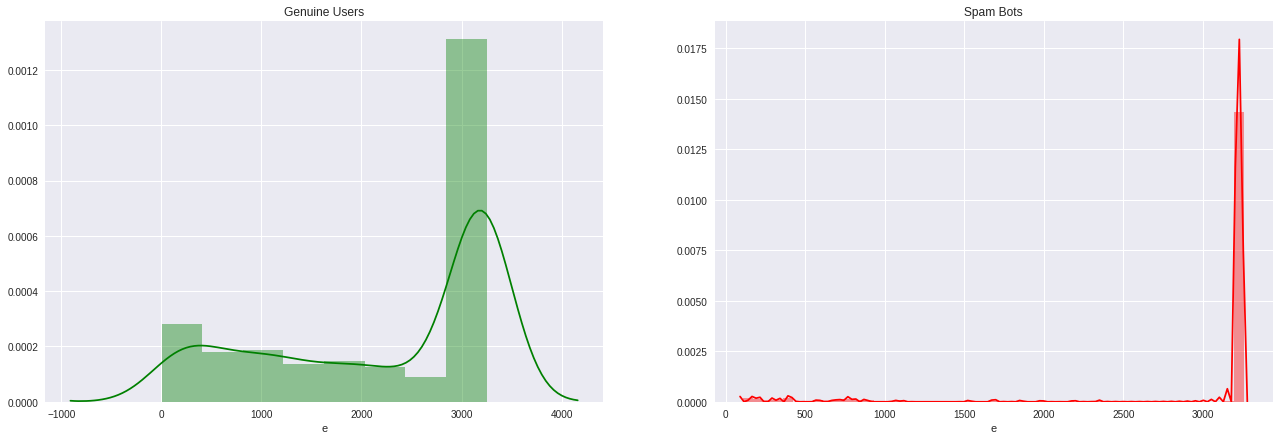

In [0]:
# distplots
fig, axs = plt.subplots(ncols=2,figsize = (22,7))
sns.distplot(g_id['e'],ax = axs[0],color = 'Green')
axs[0].title.set_text('Genuine Users')
sns.distplot(b_id['e'],ax = axs[1], color = 'Red')
axs[1].title.set_text('Spam Bots')
#plt.savefig(save_plot+'/soc_bots/5_By_ID_Tweets_by_gen_span',dpi = 300)

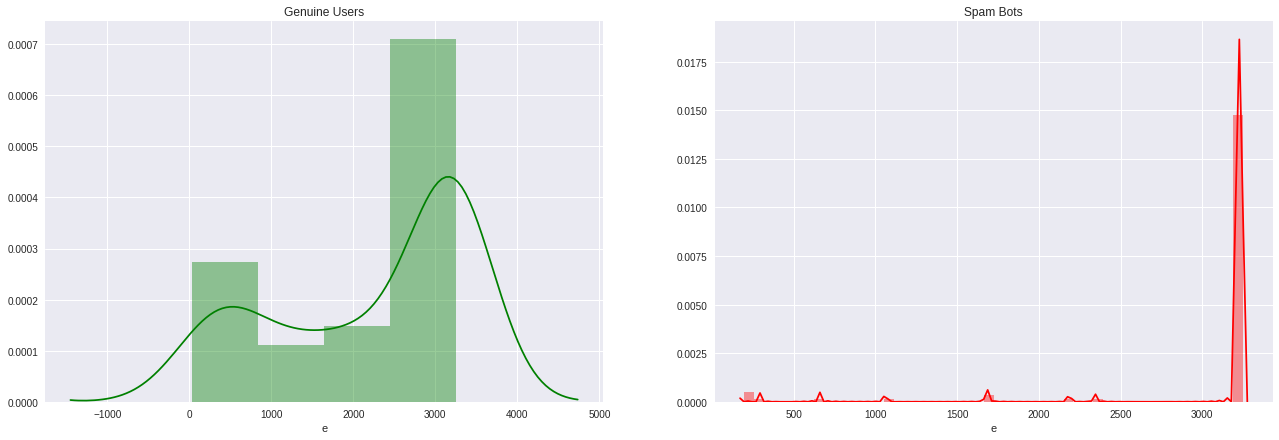

In [0]:
# distplots
fig, axs = plt.subplots(ncols=2,figsize = (22,7))
sns.distplot(g_id['e'][:100],ax = axs[0],color = 'Green')
axs[0].title.set_text('Genuine Users')
sns.distplot(b_id['e'][:100],ax = axs[1], color = 'Red')
axs[1].title.set_text('Spam Bots')
#plt.savefig(save_plot+'/soc_bots/5_ii(Clarity)_By_ID_Tweets_by_gen_span',dpi = 300)

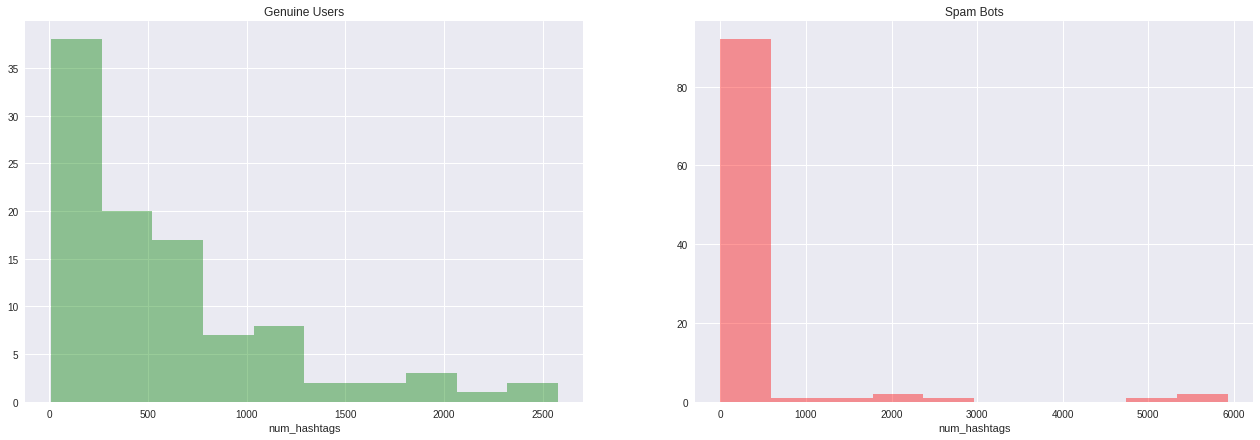

In [0]:
# distplots
fig, axs = plt.subplots(ncols=2,figsize = (22,7))
sns.distplot(g_id['num_hashtags'][:100],ax = axs[0],color = 'Green',kde = False)
axs[0].title.set_text('Genuine Users')
sns.distplot(b_id['num_hashtags'][:100],ax = axs[1], color = 'Red',kde = False)
axs[1].title.set_text('Spam Bots')
#plt.savefig(save_plot+'/soc_bots/hashtags/1_clarity_nokde',dpi = 300)

- **Plot of tweets vs hashtags and urls use **
- **Use Jointplot**

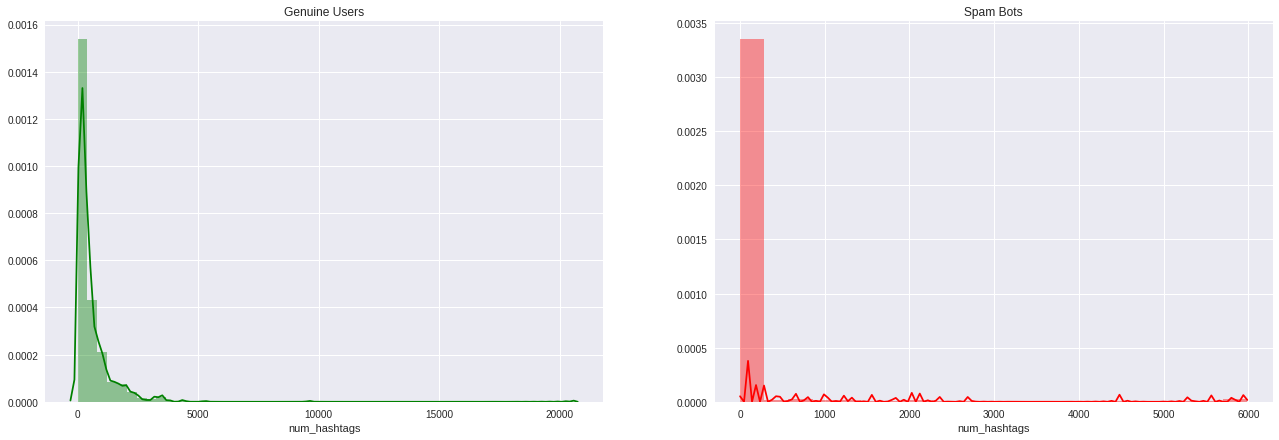

In [0]:
# distplots
fig, axs = plt.subplots(ncols=2,figsize = (22,7))
sns.distplot(g_id['num_hashtags'],ax = axs[0],color = 'Green')
axs[0].title.set_text('Genuine Users')
sns.distplot(b_id['num_hashtags'],ax = axs[1], color = 'Red')
axs[1].title.set_text('Spam Bots')
#plt.savefig(save_plot+'/soc_bots/hashtags/2_complete_kde',dpi = 300)

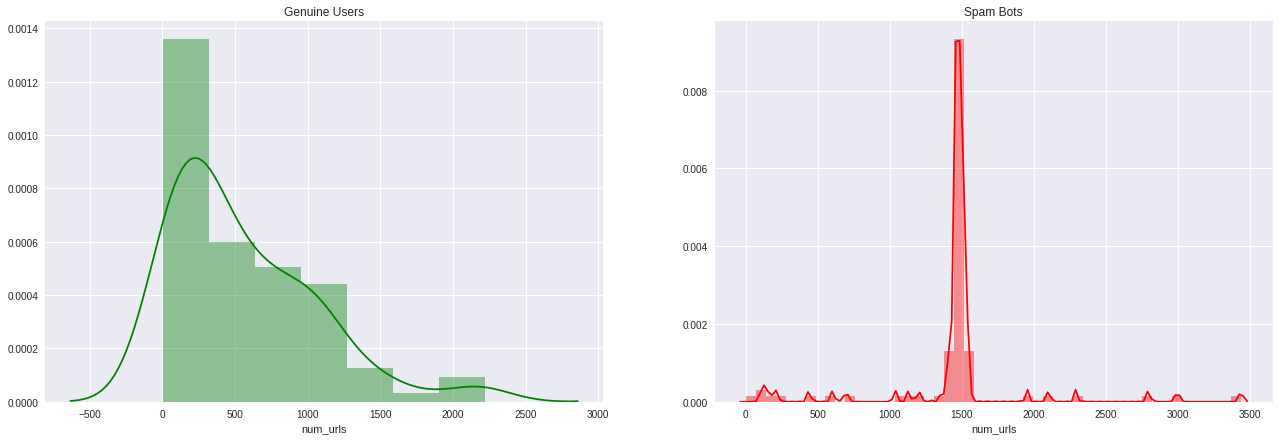

In [0]:
# distplots
fig, axs = plt.subplots(ncols=2,figsize = (22,7))
sns.distplot(g_id['num_urls'][:100],ax = axs[0],color = 'Green')
axs[0].title.set_text('Genuine Users')
sns.distplot(b_id['num_urls'][:100],ax = axs[1], color = 'Red')
axs[1].title.set_text('Spam Bots')
# plt.savefig(save_plot+'/soc_bots/hashtags/3_clarity_urls_kde',dpi = 300)

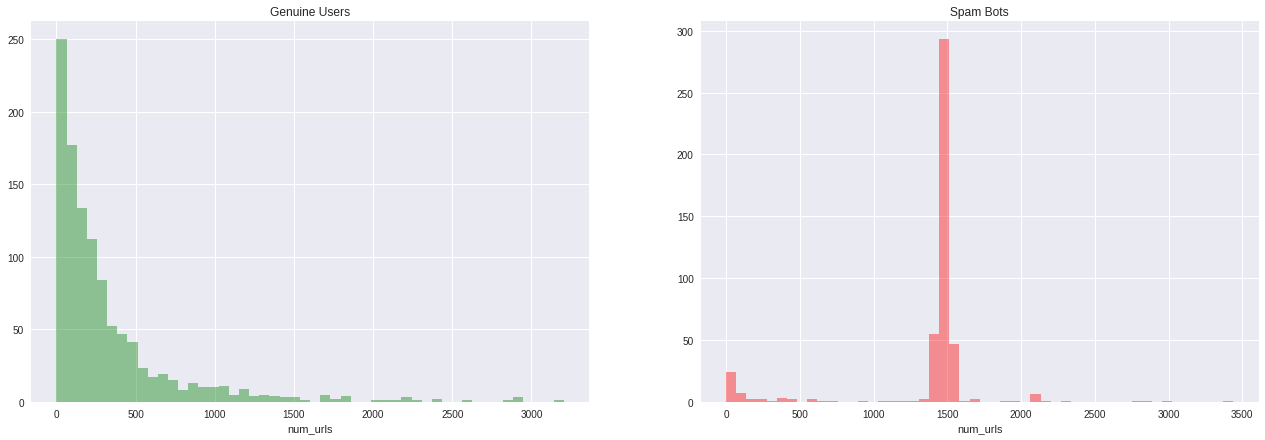

In [0]:
# distplots
fig, axs = plt.subplots(ncols=2,figsize = (22,7))
sns.distplot(g_id['num_urls'],ax = axs[0],color = 'Green', kde = False)
axs[0].title.set_text('Genuine Users')
sns.distplot(b_id['num_urls'],ax = axs[1], color = 'Red', kde = False)
axs[1].title.set_text('Spam Bots')
#plt.savefig(save_plot+'/soc_bots/hashtags/3_clarity_urls_nokde',dpi = 300)

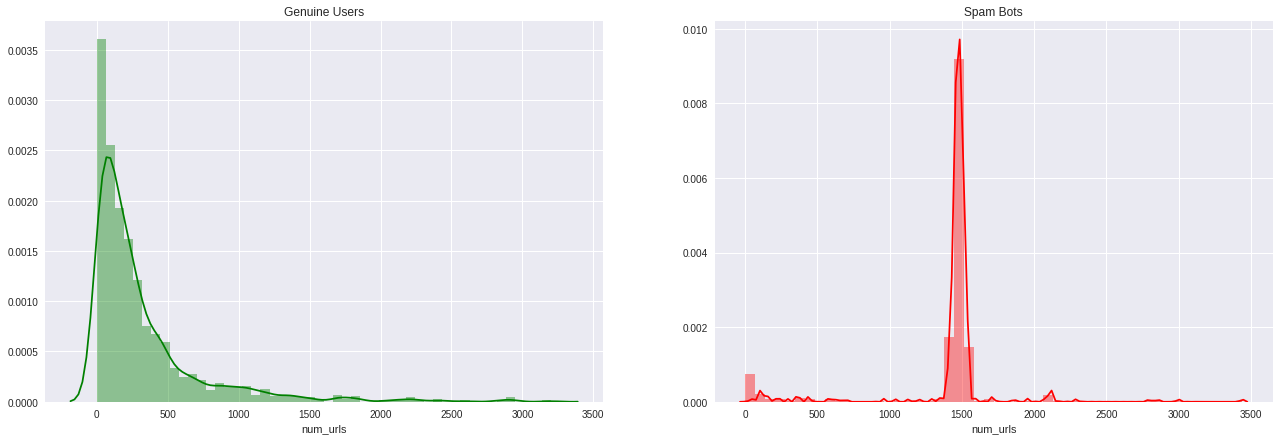

In [0]:
# distplots
fig, axs = plt.subplots(ncols=2,figsize = (22,7))
sns.distplot(g_id['num_urls'],ax = axs[0],color = 'Green')
axs[0].title.set_text('Genuine Users')
sns.distplot(b_id['num_urls'],ax = axs[1], color = 'Red')
axs[1].title.set_text('Spam Bots')
#plt.savefig(save_plot+'/soc_bots/hashtags/4_clarity_urls_kde',dpi = 400)